# Data Loader

In [1]:
with open('09.txt', 'r') as file:
    data = file.readlines()
    coords = [tuple(map(int, line.split(','))) for line in data]

# Part 1

In [2]:
biggestRect = []
biggestRectArea = 0

for i in coords:
    for j in coords:
        narea = (1+abs(i[0] - j[0])) * (1+abs(i[1] - j[1]))
        if narea > biggestRectArea:
            biggestRectArea = narea
            biggestRect = [i, j]

print(biggestRect)
print(biggestRectArea)
        

[(86461, 82630), (14428, 16855)]
4738108384


# Part 2

In [3]:


greentiles = []
for i, coord in enumerate(coords):
    nextcoord = coords[(i+1)%len(coords)]
    if coord[0] == nextcoord[0]:
        for y in range(min(coord[1], nextcoord[1]), max(coord[1], nextcoord[1])+1):
            greentiles.append((coord[0], y))
    elif coord[1] == nextcoord[1]:
        for x in range(min(coord[0], nextcoord[0]), max(coord[0], nextcoord[0])+1):
            greentiles.append((x, coord[1]))
for i, green in enumerate(greentiles):
    if green in coords:
        greentiles.pop(i)
# Find all points enclosed by the boundary (coords + greentiles)
boundary = set(coords) | set(greentiles)

# Get grid bounds (with 1 cell padding for flood fill)
min_x = min(p[0] for p in boundary) - 1
max_x = max(p[0] for p in boundary) + 1
min_y = min(p[1] for p in boundary) - 1
max_y = max(p[1] for p in boundary) + 1

In [4]:
horizontals = set()
verticals = set()   

for i,c in enumerate(coords):
    previous = coords[(i-1)%len(coords)]
    if previous[0] == c[0]:
        if(previous[1] < c[1]):
            verticals.add((c[0], c[1], previous[1]))   
        else:
            verticals.add((c[0], previous[1], c[1]))
    else:
        if(previous[0] < c[0]):
            horizontals.add((c[1], c[0], previous[0]))
        else:
            horizontals.add((c[1], previous[0], c[0]))

hspans = set()
vspans = set()  

def checkSpan(x,y, verbose=False):
    #for the horizontal span, I want to find the vertical line that first intersects the horizontal line
    # Find all verticals to the right of (x,y) that the horizontal at y would intersect,
    # then pick the closest one (smallest v[0])
    # Rightwards (downs) as before:
    matchingDownVerticals = [v for v in verticals if v[0] > x and v[1] >= y and v[2] <= y]
    rightVertical = min(matchingDownVerticals, key=lambda v: v[0]) if matchingDownVerticals else None
    if rightVertical is not None:
        hspan = ((min(x,rightVertical[0]), y), (max(x,rightVertical[0]) , y))
        if(hspan[0][0] == hspan[1][0] and hspan[0][1] == hspan[1][1]):
            pass
        else:
            if(verbose):
                print("hspan: ",hspan)
            hspans.add(hspan)
    # Now add leftwards ("ups"):
    matchingUpVerticals = [v for v in verticals if v[0] < x and v[1] >= y and v[2] <= y]
    leftVertical = max(matchingUpVerticals, key=lambda v: v[0]) if matchingUpVerticals else None
    if leftVertical is not None:
        hspan = ((min(x,leftVertical[0]), y), (max(x,leftVertical[0]) , y))
        if(hspan[0][0] == hspan[1][0] and hspan[0][1] == hspan[1][1]):
            pass
        else:
            if(verbose):
                print("hspan: ",hspan)
            hspans.add(hspan)

    # Apply to the down verticals as well (mirroring hspan/vspan for the "down" direction)
    # For the vertical span, find the next horizontal line below (down) that intersects with the vertical at (x,y)
    # Downwards ("south"), find the next horizontal line below (greater y) that intersects with the vertical at (x, y)
    matchingDownHorizontals = [h for h in horizontals if h[0] > y and h[1] >= x and h[2] <= x]
    downHorizontal = min(matchingDownHorizontals, key=lambda h: h[0]) if matchingDownHorizontals else None
    if downHorizontal is not None:
        vspan = ((x, min(y,downHorizontal[0])), (x, max(y,downHorizontal[0])))
        if(vspan[0][0] == vspan[1][0] and vspan[0][1] == vspan[1][1]):
            pass
        else:
            if(verbose):
                print("vspan: ",vspan)
            vspans.add(vspan)
    # Upwards ("north"), find the next horizontal line above (lesser y) that intersects with the vertical at (x, y)
    matchingUpHorizontals = [h for h in horizontals if h[0] < y and h[1] >= x and h[2] <= x]
    upHorizontal = max(matchingUpHorizontals, key=lambda h: h[0]) if matchingUpHorizontals else None
    if upHorizontal is not None:
        vspan = ((x, min(y,upHorizontal[0])), (x, max(y,upHorizontal[0])))
        if(vspan[0][0] == vspan[1][0] and vspan[0][1] == vspan[1][1]):
            pass
        else:
            if(verbose):
                print("vspan: ",vspan)
            vspans.add(vspan)
   
# now let's walk around the perimeter of the shape, looking for all potential lines to the right of us that inersect
for i,c in enumerate(coords):
    currentX=c[0]
    currentY=c[1]


    checkSpan(currentX, currentY)
   

hspanscopy = hspans.copy()
for h in hspanscopy:
    for h2 in hspans:
        if h != h2:
            if h[0][1] == h2[0][1] and (h[0][0] >= h2[0][0] or h[1][0] <= h2[1][0]):
                if h in hspans:
                    hspans.remove(h)
                hspans.remove(h2)
                h3 = ((min(h[0][0],h2[0][0]),h[0][1]), ( max(h[1][0],h2[1][0]),h[0][1]))
                hspans.add(h3)
                break

vspanscopy = vspans.copy()
for v in vspanscopy:
    for v2 in vspans:
        if v != v2:
            if v[0][0] == v2[0][0] and (v[0][1] >= v2[0][1] or v[1][1] <= v2[1][1]):
                if v in vspans:
                    vspans.remove(v)
                # print("removing v: ",v)
                # print("removing v2: ",v2)
                vspans.remove(v2)
                v3 = ((v[0][0],min(v[0][1],v2[0][1])), (v[0][0],max(v[1][1],v2[1][1])))
                # print("adding v3: ",v3)
                vspans.add(v3)
                break

# print("hspans: ",len(hspans))
# for h in hspans:
#     # print(h)
#     print(h[0][1], ":", h[0][0], "to", h[1][0], "length", h[1][0] - h[0][0])
# print("--------------------------------")
# print("vspans: ",len(vspans) )
# for v in vspans:
#     # print(v)
#     print(v[0][0], ":", v[0][1], "to", v[1][1], "length", v[1][1] - v[0][1])
# print("--------------------------------")
# now that we have the list of spans, we want to find spans that 
#enumerate through the coordinates




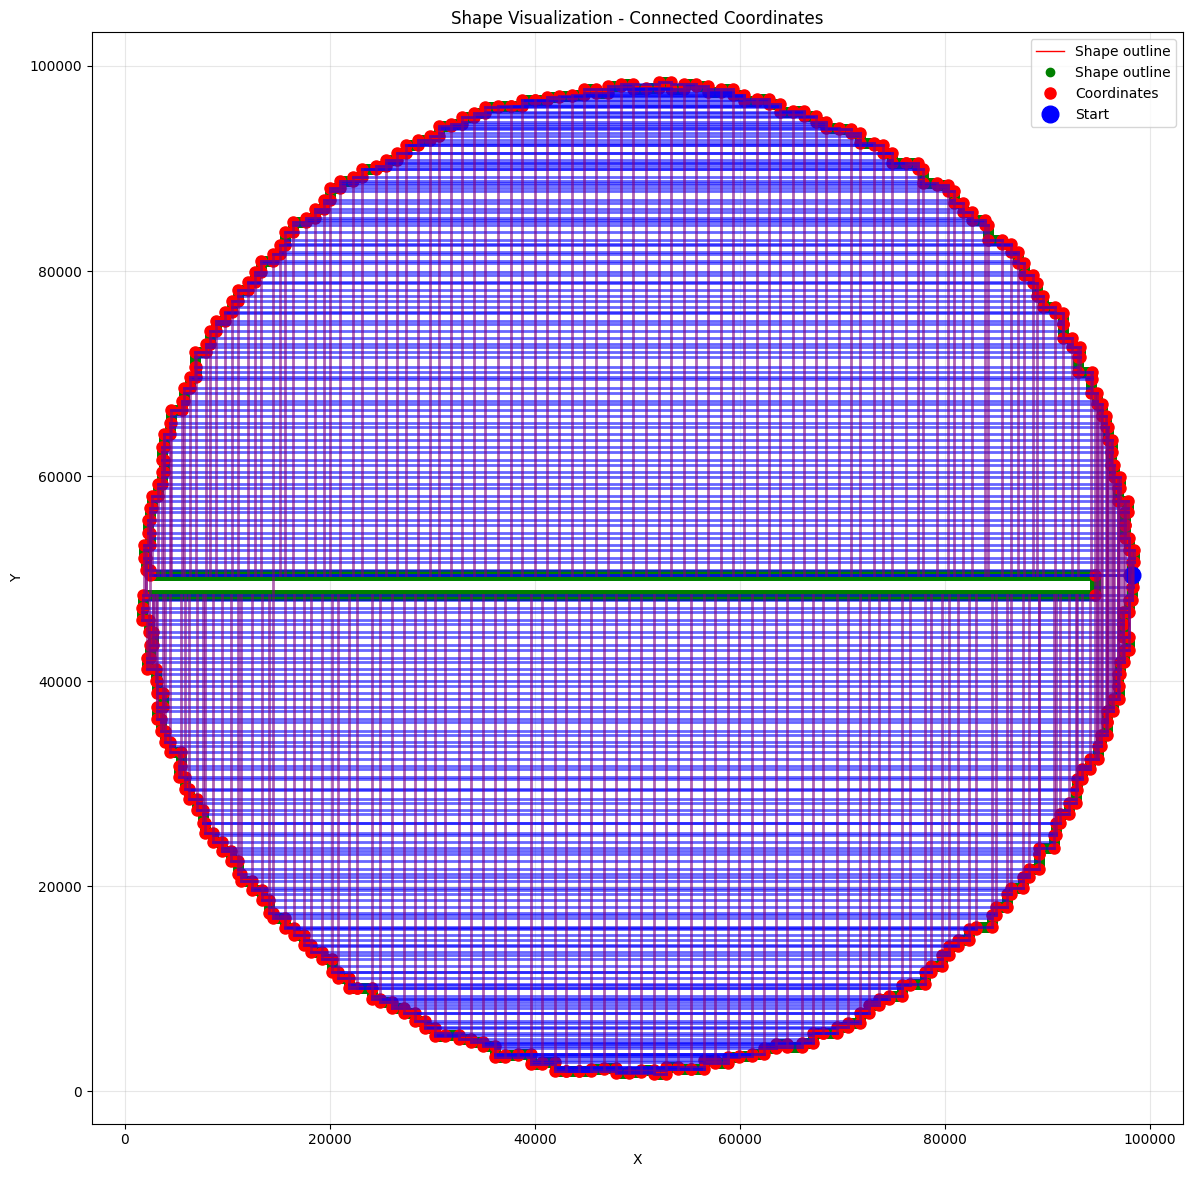

Total coordinates: 496
X range: 1649 to 98394
Y range: 1674 to 98440


In [5]:

import matplotlib.pyplot as plt
import numpy as np

# Create visualization of the shape
fig, ax = plt.subplots(figsize=(12, 12))

# Extract x and y coordinates
x_coords = [c[0] for c in coords]
y_coords = [c[1] for c in coords]
x1_coords = [c[0] for c in greentiles]
y1_coords = [c[1] for c in greentiles]

# Connect all coordinates in order (close the shape by connecting last to first)
x_coords_closed = x_coords + [x_coords[0]]
y_coords_closed = y_coords + [y_coords[0]]
x1_coords_closed = x1_coords + [x1_coords[0]]
y1_coords_closed = y1_coords + [y1_coords[0]]
# Plot the connected shape
ax.plot(x_coords_closed, y_coords_closed, 'r-', linewidth=1, label='Shape outline')
ax.plot(x1_coords_closed, y1_coords_closed, 'go', linewidth=1, label='Shape outline')
ax.plot(x_coords, y_coords, 'ro', markersize=8, label='Coordinates')

# Mark the first coordinate differently
ax.plot(x_coords[0], y_coords[0], 'bo', markersize=12, label='Start')

# Add grid for better visibility
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Shape Visualization - Connected Coordinates')
ax.set_xlabel('X')
ax.set_ylabel('Y')
# Plot hspans in purple
for h in hspans:
    xh = [h[0][0], h[1][0]]
    yh = [h[0][1], h[1][1]]
    ax.plot(xh, yh, color='blue', linewidth=2, alpha=0.6, zorder=2)

# Plot vspans in purple
for v in vspans:
    xv = [v[0][0], v[1][0]]
    yv = [v[0][1], v[1][1]]
    ax.plot(xv, yv, color='purple', linewidth=2, alpha=0.6, zorder=2)

plt.tight_layout()
plt.show()

# Also print some info
print(f"Total coordinates: {len(coords)}")
print(f"X range: {min(x_coords)} to {max(x_coords)}")
print(f"Y range: {min(y_coords)} to {max(y_coords)}")


In [ ]:
maxArea = 0
maxpair = None
pairs = []
# goodCoords = [(94654,50355), (94654,48393)]
for i,c in enumerate(coords):
    currentX=c[0]
    currentY=c[1]
    for j, d in enumerate(coords):
        if(d == c):
            continue
        else:
            otherX=d[0]
            otherY=d[1]
            # if currentX == otherX or currentY == otherY :
            #     continue
            # if(currentX >= otherX or currentY <= otherY):
            #     continue
            #are there spans that connect from currentX to otherX on currentY?
            # find a span that goes from at least currentX to at least otherX on currentY
            maxX = max(currentX, otherX)
            minX = min(currentX, otherX)
            maxY = max(currentY, otherY)
            minY = min(currentY, otherY)
            
            hspan1 = next((v for v in hspans if v[0][1] == currentY and v[0][0] <= minX and v[1][0] >= maxX), None)
            hspan2 = next((v for v in hspans if v[0][1] == otherY and v[0][0] <= minX and v[1][0] >= maxX), None)
            vspan1 = next((h for h in vspans if h[0][0] == currentX and h[0][1] <= minY and h[1][1] >= maxY), None)
            vspan2 = next((h for h in vspans if h[0][0] == otherX and h[0][1] <= minY and h[1][1] >= maxY), None)
            # print("Testing: ", (currentX,currentY), (otherX,otherY), hspan1, hspan2, vspan1, vspan2)
            if(hspan1 and hspan2 and vspan1 and vspan2):
                a = (abs(currentX - otherX)+1) * (abs(currentY - otherY) + 1)
                # print("a: ",a, "currentX: ",currentX, "otherX: ",otherX, "currentY: ",currentY, "otherY: ",otherY)
                pairs.append((a, (currentX,currentY), (otherX,otherY)))
                if(a > maxArea):
                    # print("!!!! Found anew maxarea candidate: ",a, (currentX,currentY), (otherX,otherY), )
                    maxArea = a
                    maxpair = ((currentX,currentY),(otherX,otherY))
                # else:
                    # print("Found a nonmax candidate: ",a, (currentX,currentY), (otherX,otherY), )
                    #   print("found a span that connects from ",(currentX,currentY)," to ",(otherX,otherY))
            # else:
                # print("No spans found for: ", (currentX,currentY), (otherX,otherY), hspan1, hspan2, vspan1, vspan2)
            # find a span that goes from at least otherX to at least currentX on otherY
            # if((currentX,currentY) in hspans and (otherX,otherY) in hspans):
            #     print("found a span that connects from ",(currentX,currentY)," to ",(otherX,otherY))

    #check if the current coordinate is the start of a horizontal span
    # if((currentX,currentY) in hspans):
print(maxArea)
print(maxpair)
pairs.sort(key=lambda x: x[0], reverse=True)
print(pairs)


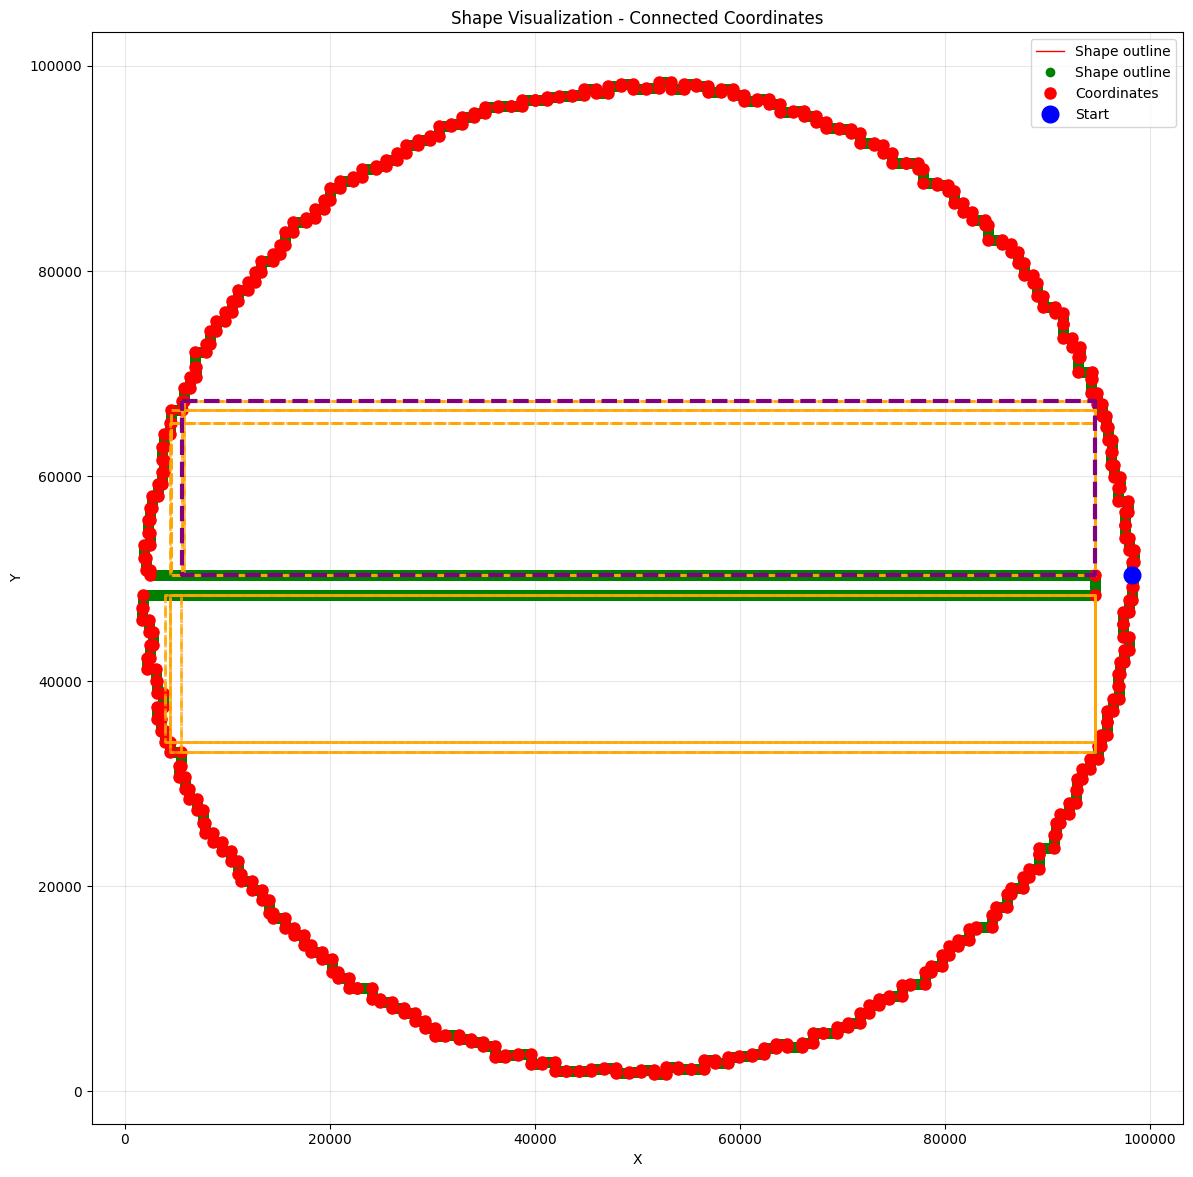

Total coordinates: 496
X range: 1649 to 98394
Y range: 1674 to 98440


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Create visualization of the shape
fig, ax = plt.subplots(figsize=(12, 12))

# Extract x and y coordinates
x_coords = [c[0] for c in coords]
y_coords = [c[1] for c in coords]
x1_coords = [c[0] for c in greentiles]
y1_coords = [c[1] for c in greentiles]

# Connect all coordinates in order (close the shape by connecting last to first)
x_coords_closed = x_coords + [x_coords[0]]
y_coords_closed = y_coords + [y_coords[0]]
x1_coords_closed = x1_coords + [x1_coords[0]]
y1_coords_closed = y1_coords + [y1_coords[0]]
# Plot the connected shape
ax.plot(x_coords_closed, y_coords_closed, 'r-', linewidth=1, label='Shape outline')
ax.plot(x1_coords_closed, y1_coords_closed, 'go', linewidth=1, label='Shape outline')
ax.plot(x_coords, y_coords, 'ro', markersize=8, label='Coordinates')

# Mark the first coordinate differently
ax.plot(x_coords[0], y_coords[0], 'bo', markersize=12, label='Start')

# Add grid for better visibility
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Shape Visualization - Connected Coordinates')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Draw all rectangles implied by the top 20 pairs (area, (x0, y0), (x1, y1)) in 'pairs'
for _, (x0, y0), (x1, y1) in pairs[1:20]:
    rect_x = [x0, x1, x1, x0, x0]
    rect_y = [y0, y0, y1, y1, y0]
    ax.plot(rect_x, rect_y, color='orange', linewidth=2, linestyle='--', alpha=0.7)

(x0, y0), (x1, y1) = maxpair
rect_x = [x0, x1, x1, x0, x0]
rect_y = [y0, y0, y1, y1, y0]
ax.plot(rect_x, rect_y, color='purple', linewidth=3, linestyle='--', label='maxpair rectangle')

plt.tight_layout()
plt.show()

# Also print some info
print(f"Total coordinates: {len(coords)}")
print(f"X range: {min(x_coords)} to {max(x_coords)}")
print(f"Y range: {min(y_coords)} to {max(y_coords)}")


In [ ]:
print("Max area (in purple) is: ", maxArea)

Max area (in purple) is:  1513792010
